  <h2><U>OBJECTIVES</U></H2>
0. <H4>FIGURE OUT THE MONTHLY TREND OF SALES</H4>  
1. <H4>WHICH ARE THE MOST TOP PRODUCTS BY SALES</H4>
2. <H4>WHICH ARE THE MOST SELLING PRODUCTS</H4>
3. <H4>WHAT IS THE MOST PREFERED SHIPPING MODEL</H4>
4. <H4>WHICH ARE THE MOST PROFITABLE CATERGORIES AND SUB CARTEGORIES</H4>

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_excel('C:\\Users\\Judah.Chisare\\Desktop\\superstore_sales.xlsx')
df.head()

order_id order_date  ship_date       ship_mode    customer_name  \
0     AG-2011-2040 2011-01-01 2011-01-06  Standard Class  Toby Braunhardt   
1    IN-2011-47883 2011-01-01 2011-01-08  Standard Class      Joseph Holt   
2     HU-2011-1220 2011-01-01 2011-01-05    Second Class    Annie Thurman   
3  IT-2011-3647632 2011-01-01 2011-01-05    Second Class     Eugene Moren   
4    IN-2011-47883 2011-01-01 2011-01-08  Standard Class      Joseph Holt   

       segment            state    country  market   region  ...   \
0     Consumer      Constantine    Algeria  Africa   Africa  ...    
1     Consumer  New South Wales  Australia    APAC  Oceania  ...    
2     Consumer         Budapest    Hungary    EMEA     EMEA  ...    
3  Home Office        Stockholm     Sweden      EU    North  ...    
4     Consumer  New South Wales  Australia    APAC  Oceania  ...    

          category sub_category                 product_name    sales  \
0  Office Supplies      Storage          Tenex Lockers, Blue  408.300   
1  Office Supplies     Supplies     Acme Trimmer, High Speed  120.366   
2  Office Supplies      Storage      Tenex Box, Single Width   66.120   
3  Office Supplies        Paper  Enermax Note Cards, Premium   44.865   
4        Furniture  Furnishings   Eldon Light Bulb, Duo Pack  113.670   

   quantity  discount   profit  shipping_cost  order_priority  year  
0         2       0.0  106.140          35.46          Medium  2011  
1         3       0.1   36.036           9.72          Medium  2011  
2         4       0.0   29.640           8.17            High  2011  
3         3       0.5  -26.055           4.82            High  2011  
4         5       0.1   37.770           4.70          Medium  2011  

[5 rows x 21 columns]

In [76]:
#THE EALIEST ORDER DATE
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [77]:
#THE LATEST ORDER DATE

df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [78]:
#GETTING MONTH YEAR FROM THE DATASET 

df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [59]:
df.groupby('month_year').sum()['sales'].reset_index()

month_year         sales
0     2011-01   98898.48886
1     2011-02   91152.15698
2     2011-03  145729.36736
3     2011-04  116915.76418
4     2011-05  146747.83610
5     2011-06  215207.38022
6     2011-07  115510.41912
7     2011-08  207581.49122
8     2011-09  290214.45534
9     2011-10  199071.26404
10    2011-11  298496.53752
11    2011-12  333925.73460
12    2012-01  135780.72024
13    2012-02  100510.21698
14    2012-03  163076.77116
15    2012-04  161052.26952
16    2012-05  208364.89124
17    2012-06  256175.69842
18    2012-07  145236.78512
19    2012-08  303142.94238
20    2012-09  289389.16564
21    2012-10  252939.85020
22    2012-11  323512.41690
23    2012-12  338256.96660
24    2013-01  199185.90738
25    2013-02  167239.65040
26    2013-03  198594.03012
27    2013-04  177821.31684
28    2013-05  260498.56470
29    2013-06  396519.61190
30    2013-07  229928.95200
31    2013-08  326488.78936
32    2013-09  376619.24568
33    2013-10  293406.64288
34    2013-11  373989.36010
35    2013-12  405454.37802
36    2014-01  241268.55566
37    2014-02  184837.35556
38    2014-03  263100.77262
39    2014-04  242771.86130
40    2014-05  288401.04614
41    2014-06  401814.06310
42    2014-07  258705.68048
43    2014-08  456619.94236
44    2014-09  481157.24370
45    2014-10  422766.62916
46    2014-11  555279.02700
47    2014-12  503143.69348

In [79]:
df_trend=df.groupby('month_year').sum()['sales'].reset_index()

- <H3>FIGURE OUT THE MONTHLY TREND OF SALES</H3>  

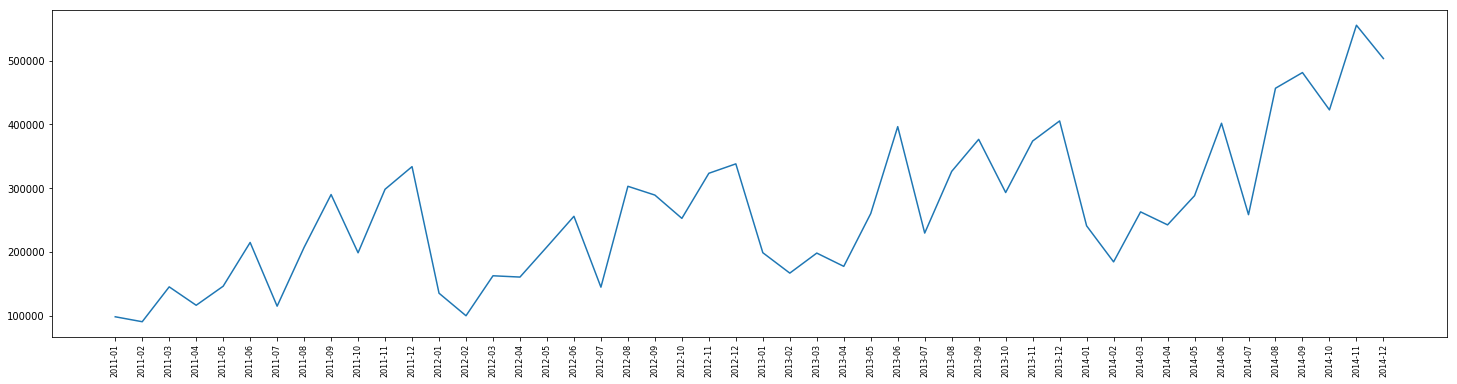

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,6))
plt.xticks(rotation='vertical',size=8)
plt.plot(df_trend['month_year'],df_trend['sales'])
plt.show()

- <H3>WHICH ARE THE MOST TOP 10 PRODUCTS BY SALES</H3>

In [81]:
dt=df.groupby('product_name').sum()['sales'].reset_index()

In [82]:
dt.head(10)

product_name     sales
0  "While you Were Out" Message Book, One Form pe...    25.228
1           #10 Gummed Flap White Envelopes, 100/Box    41.300
2                      #10 Self-Seal White Envelopes   108.682
3         #10 White Business Envelopes,4 1/8 x 9 1/2   488.904
4            #10- 4 1/8" x 9 1/2" Recycled Envelopes   286.672
5       #10- 4 1/8" x 9 1/2" Security-Tint Envelopes   146.688
6  #10-4 1/8" x 9 1/2" Premium Diagonal Seam Enve...   176.288
7                 #6 3/4 Gummed Flap White Envelopes    71.280
8  1.7 Cubic Foot Compact "Cube" Office Refrigera...  2706.080
9  1/4 Fold Party Design Invitations & White Enve...    49.980

In [83]:
#TOP TEN PRODUCT BY SALES 

dtSOTED=dt.sort_values('sales',ascending=False).reset_index()
dtSOTED[:10]

index                                       product_name       sales
0    310                       Apple Smart Phone, Full Size  86935.7786
1    970                       Cisco Smart Phone, Full Size  76441.5306
2   2415                    Motorola Smart Phone, Full Size  73156.3030
3   2501                       Nokia Smart Phone, Full Size  71904.5555
4    866              Canon imageCLASS 2200 Advanced Copier  61599.8240
5   1837         Hon Executive Leather Armchair, Adjustable  58193.4841
6   2631  Office Star Executive Leather Armchair, Adjust...  50661.6840
7   1714  Harbour Creations Executive Leather Armchair, ...  50121.5160
8   2988                      Samsung Smart Phone, Cordless  48653.4600
9   2502                  Nokia Smart Phone, with Caller ID  47877.7857

- <H3> WHAT ARE THE MOST SELLING PRODUCTS

In [84]:
df3=pd.DataFrame(df.groupby('product_name').sum()['quantity'].reset_index())

In [85]:
df3.head()


product_name  quantity
0  "While you Were Out" Message Book, One Form pe...         8
1           #10 Gummed Flap White Envelopes, 100/Box        11
2                      #10 Self-Seal White Envelopes        10
3         #10 White Business Envelopes,4 1/8 x 9 1/2        32
4            #10- 4 1/8" x 9 1/2" Recycled Envelopes        37

In [86]:
df4=df3.sort_values('quantity',ascending=False).reset_index()

In [113]:
df4.head()

index                           product_name  quantity
0   3275                                Staples       876
1    894              Cardinal Index Tab, Clear       337
2   1210          Eldon File Cart, Single Width       321
3   2840         Rogers File Cart, Single Width       262
4   3070  Sanford Pencil Sharpener, Water Color       259

In [87]:
df4[:10]

index                           product_name  quantity
0   3275                                Staples       876
1    894              Cardinal Index Tab, Clear       337
2   1210          Eldon File Cart, Single Width       321
3   2840         Rogers File Cart, Single Width       262
4   3070  Sanford Pencil Sharpener, Water Color       259
5   3335  Stockwell Paper Clips, Assorted Sizes       253
6    446                 Avery Index Tab, Clear       252
7   1981                 Ibico Index Tab, Clear       251
8   3179          Smead File Cart, Single Width       250
9   3266  Stanley Pencil Sharpener, Water Color       242

- <h3> WHAT IS THE MOST PREFERED SHIPPING MODEL

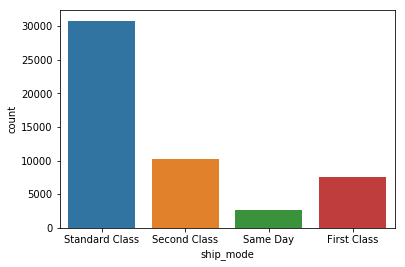

In [88]:
import seaborn as sns

sns.countplot(df['ship_mode'])
plt.show()

- <h3> WHICH ARE THE MOST PROFITABLE CATERGORIES AND SUB CARTEGORIES

In [89]:

df10=pd.DataFrame(df.groupby(['category','sub_category']).sum()['profit'])

In [71]:
df10

profit
category        sub_category              
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870
Office Supplies Appliances    141680.58940
                Art            57953.91090
                Binders        72449.84600
                Envelopes      29601.11630
                Fasteners      11525.42410
                Labels         15010.51200
                Paper          59207.68270
                Storage       108461.48980
                Supplies       22583.26310
Technology      Accessories   129626.30620
                Copiers       258567.54818
                Machines       58867.87300
                Phones        216717.00580